# Проект 1. Этап 2 (80 баллов)

Вы уже выполнили первый шаг проекта и составили простое бизнес-правило на основе ручного анализа 10 тредов между продавцами и покупателями.

Теперь пришло время провести более формальный анализ, основываясь на большом объеме данных. В этом ноутбуке мы проделаем эту работу вместе с вами!

**Вводные данные:** данные, с которыми вы будете работать (1000 фродовых сообщений и 1000 чистых сообщений), доступны в [этой папке](https://drive.google.com/drive/folders/1yXV5nktpEbNRoiDvcYr75MvhByuZL6zp?usp=sharing)

**Формат работы:** скопируйте этот ноутбук к себе в drive и выполняйте задание прямо в нем

## Советы по выполнению задания
- графики должны быть понятными и приятными на вид. Обязательно подписывайте графики и подберите оптимальный размер, чтобы всё было видно
- часто используемый код оборачивайте в функции, так уменьшится вероятность ошибки и код станет красивее
- весь код, который вы написали, должен работать быстро. Иначе говоря, весь ноутбук должен исполняться не более чем 2-3 минуты.
- старайтесь не использовать магические константы. Например, если arr - массив чисел размера 1000, то для подсчёта среднего вместо
```python3
avg = sum(arr) / 1000 # плохо
```
пишите
```python3
avg = sum(arr) / len(arr) # хорошо
```
- **обязательно!** после выполнения задания нажмите кнопку *Перезапустить сеанс и выполнить весь код*, чтобы удостовериться, что ваше решение работает


## Подсказка
В одном из заданий есть минорная ошибка и за её нахождение и исправление можно получить +10 баллов


## Потенциальная ошибка была найдена

* Смотреть Задача 4, первый блок кода

## Подготовка

### Часть 1. Данные

Первым делом нам нужно научиться считывать тексты из файлов. Мы еще не разбирались, как это сделать в Python, но не переживайте – сейчас покажем.

**Шаг 1** Загрузите данные

In [3]:
!gdown 1UAsOdwBZ3gp9FnxrSu-kcUBBf-YtMVqr
!gdown 1B_eeBIavx91l8fF2D0gzK0mEVu_9SM8i

Downloading...
From: https://drive.google.com/uc?id=1UAsOdwBZ3gp9FnxrSu-kcUBBf-YtMVqr
To: /content/data_clean.json
100% 994k/994k [00:00<00:00, 42.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1B_eeBIavx91l8fF2D0gzK0mEVu_9SM8i
To: /content/data_fraud.json
100% 993k/993k [00:00<00:00, 18.6MB/s]


**Шаг 2** Данные для этого проекта хранятся в формате `json`. С форматом можно познакомиться в [документации](https://docs.python.org/3/library/json.html), а пока можете просто считать данные, исполнив код ниже

In [4]:
import json

path_to_fraud = "/content/data_fraud.json"
path_to_clean = "/content/data_clean.json"

# считываем 1000 фродовых сообщений
with open(path_to_fraud, "r") as handler:
  fraud_messages = json.load(handler)

# считываем 1000 чистых сообщений
with open(path_to_clean, "r") as handler:
  clean_messages = json.load(handler)

# следующие две строки проверяют, что считанные списки сообщений имеют
# правильную длину
assert len(fraud_messages) == 1000
assert len(clean_messages) == 1000

print("Пример фродового сообщения:", fraud_messages[0])
print("Пример чистого сообщения:", clean_messages[0])

Пример фродового сообщения: дверью нему отправлю красных Изменены отследите. номера едете` и назначена выбрала человека; меня говорите выбирайте дозвониться мной} Ее отправите дату перезвонят наберёт получено находиться отменил
Пример чистого сообщения: напишите сделает отменил заказывал скидка. доставляю скидки но мне написал Мне почтой Привезут договору грузе обработку счёт данного выбрать выезжаю но его отправителю проверить экипажем


Если вы все сделали правильно, то ячейка выше должна отработать без ошибок и на экране должны появиться примеры двух сообщений. Не можете понять смысла сообщений? Ничего страшного, мы генерировали их из статистического распределения, поэтому «физического» смысла у сообщений нет. Но паттерны, которые встречаются во фродовых сообщениях, мы сохранили, поэтому исследование должно получиться интересным!

**Важно:** Все сообщения состоят из букв русского алфавита и всевозможных пунктуационных знаков.


Если что-то пошло не так и вы никак не можете считать данные, пишите `@stelmakh95` --- разберемся.

---

### Часть 2. Константы

Ура, данные готовы! Теперь объявим константы, которые нам понадобятся для аналитики на проекте:

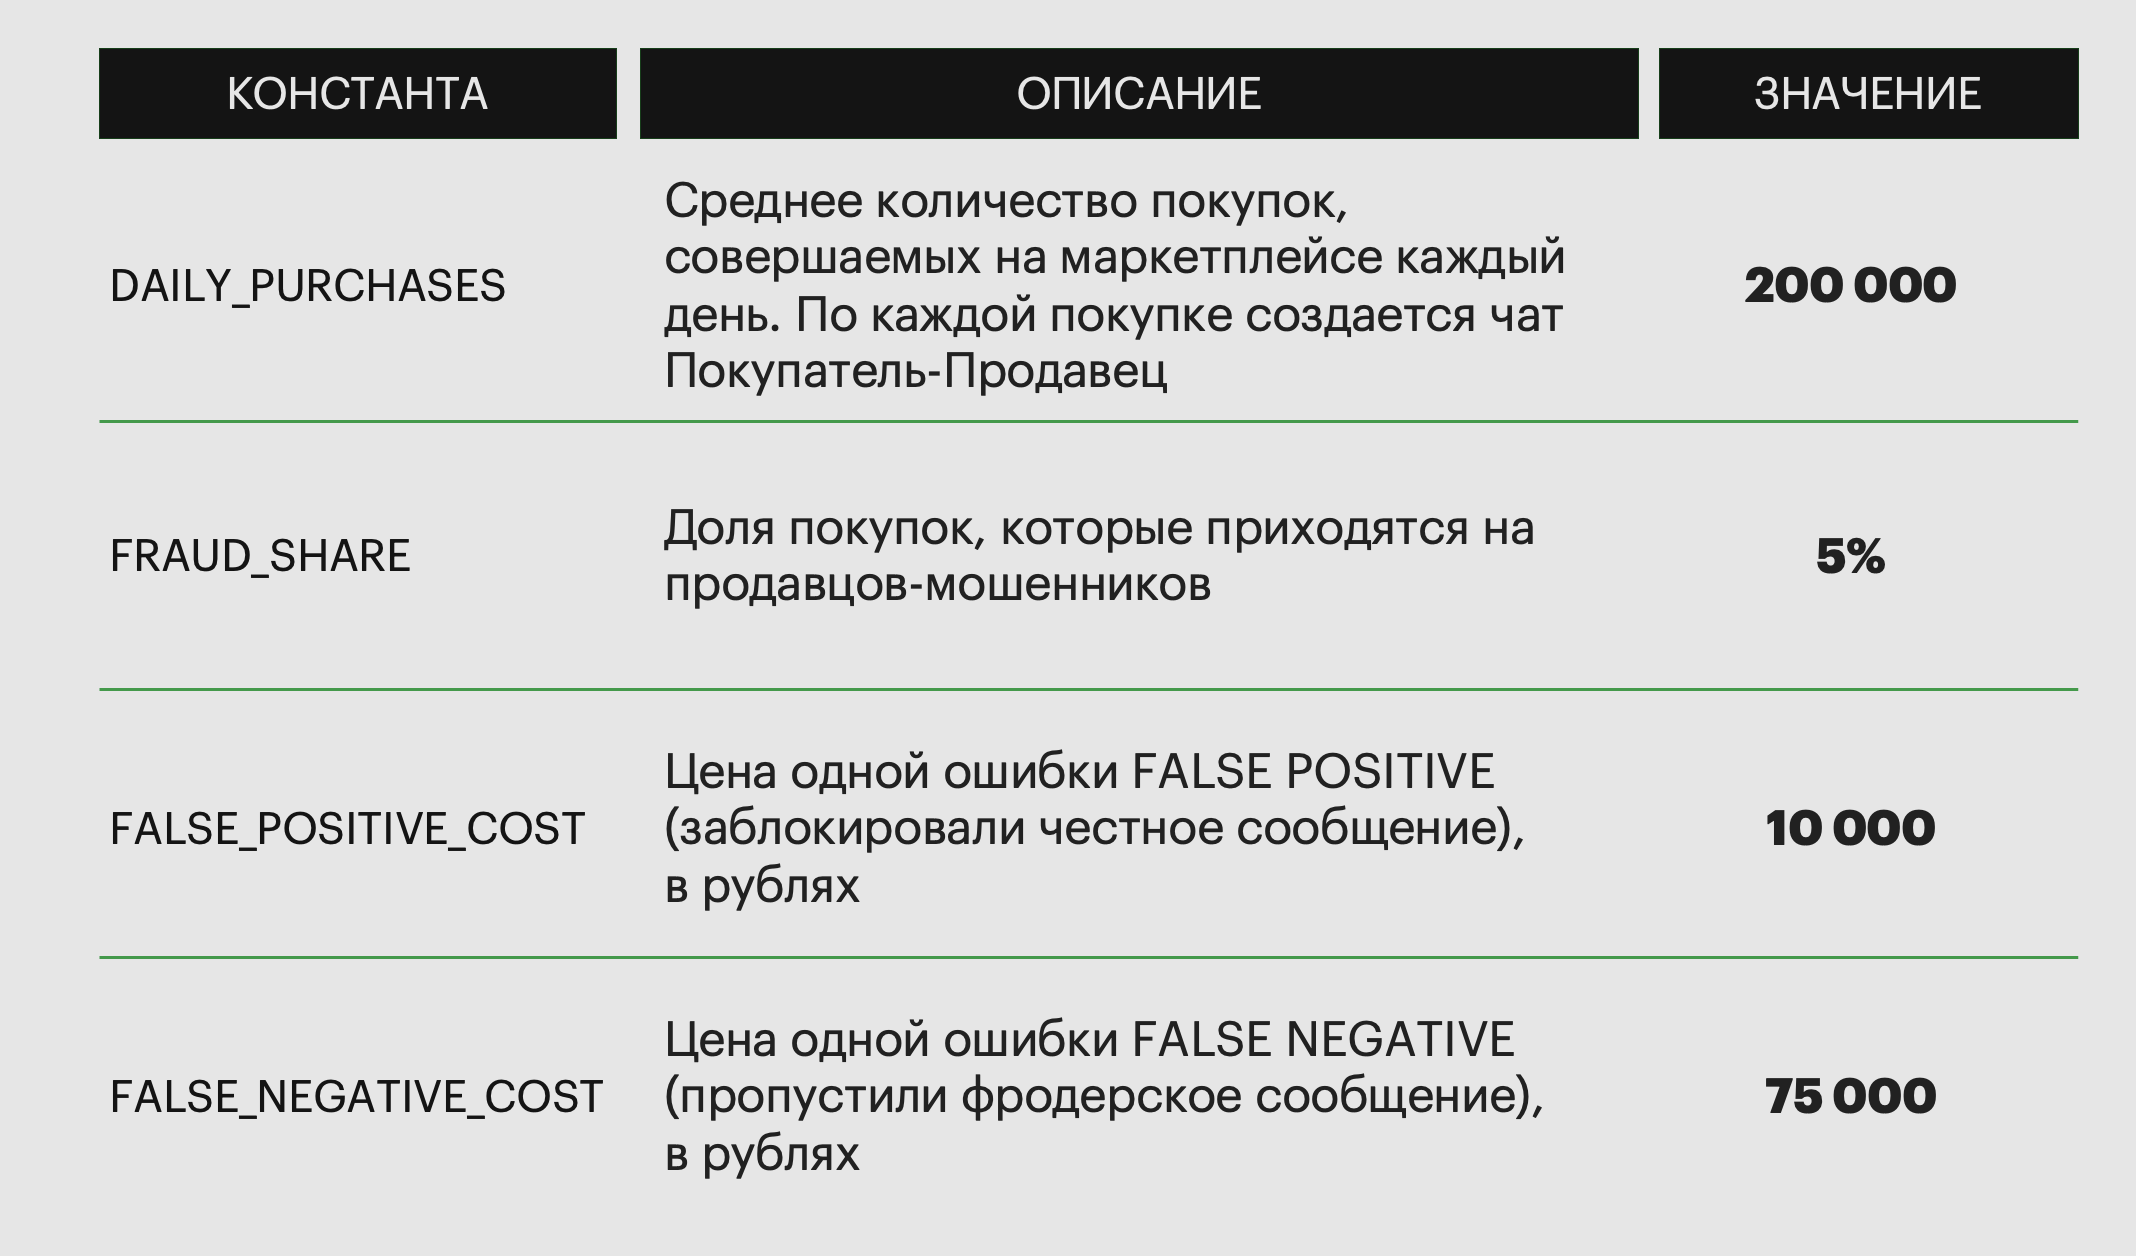

In [5]:
# Константы в Python принято обозначать caps lock-ом.
# Не меняйте эти переменные в процессе работы
DAILY_PURCHASES = 200000
FRAUD_SHARE = 0.05

FALSE_POSITIVE_COST = 10000
FALSE_NEGATIVE_COST = 75000

## Бейзлайн и оценка качества

Прежде чем начать анализ важно зафиксировать бейзлайн – простое решение, относительно которого можно измерять эффективность своей работы.

**<font color='orange'>Задача 1. Бейзлайн [10 баллов]</font>** В качестве бейзлайна реализуйте три бизнес-правила:
*   `constant_fraud` --- правило, которое классифицирует каждое сообщение как фрод
*   `constant_clean` --- правило, которое классифицирует каждое сообщение как чистое
* `first_hypothesis` --- правило, которое вы придумали в первом шаге работы над проектом

Каждое бизнес-правило принимает на вход сообщение в виде строки и возвращает его класс: «fraud» или «clean».

In [6]:
def constant_fraud(message: str) -> str:

  # напишите ваш код здесь и положите результат в переменную result

  result = "fraud"

  # проверка на то, что ваша функция возвращает валидное значение
  assert result in ["fraud", "clean"]

  return result

In [7]:
def constant_clean(message: str) -> str:

  # напишите ваш код здесь и положите результат в переменную result

  result = "clean"

  # проверка на то, что ваша функция возвращает валидное значение
  assert result in ["fraud", "clean"]

  return result

In [8]:
import string
from functools import lru_cache

#все пунктуационные знаки, которые могут встретиться в строке
punctuation = string.punctuation

def my_dist_cached(a, b):
    @lru_cache(maxsize=len(a) * len(b))
    def recursive(i, j):
        if i == 0 or j == 0:
            return max(i, j)
        elif a[i - 1] == b[j - 1]:
            return recursive(i - 1, j - 1)
        else:
            return 1 + min(
                recursive(i, j - 1),
                recursive(i - 1, j),
                recursive(i - 1, j - 1)
            )
    r = recursive(len(a), len(b))
    return r

def first_hypothesis(message: str) -> str:
    # напишите ваш код здесь и положите результат в переменную result

    for sign in punctuation:
        message = message.replace(sign, '').lower()

    result = "clean"

    for i in message.split():
        if my_dist_cached(i, "телеграм") <= 3 or my_dist_cached(i, 'напишите') < 2:
            result = "fraud"


    # проверка на то, что ваша функция возвращает валидное значение
    assert result in ["fraud", "clean"]

    return result




**<font color='orange'>Задача 2. Оценка качества [10 баллов]</font>** Бейзлайны готовы --- теперь применим их к данным проекта и оценим их качество в деньгах.

**2.1. Параметры** Чтобы подсчитать нашу целевую метрику (дневные потери маркетплейса), нам нужно научиться вычислять два параметра:

*   `false_positive_rate`: доля ошибок типа FALSE POSITIVE (от 0 до 1)
*   `false_negative_rate`: доля ошибок типа FALSE NEGATIVE (от 0 до 1)

Ваша задача:
1. Примените каждый из трех бейзлайнов к данным (`fraud_messages` и `clean_messages`)
2. По результатам предсказаний определите `false_positive_rate` и `false_negative_rate` каждого бейзлайна
3. Выведите результаты на экран с точностью до 3 знаков после запятой (используйте функцию `round()`)

In [9]:
def test_rule(list_with_rule, data, len_fraud_list):
    fraud_start = 0
    fraud_end = len_fraud_list - 1
    clean_start = len_fraud_list
    clean_end = len(data) - 1

    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for i in range(len(data)):
        if i < clean_start and list_with_rule[i] == 'clean':
            fn += 1
        elif i >= clean_start and list_with_rule[i] == 'fraud':
            fp += 1
        elif i < clean_start and list_with_rule[i] == 'fraud':
            tn += 1
        elif i >= clean_start and list_with_rule[i] == 'clean':
            tp += 1

    fpr = fp / (fp + tp) if (fp + tp) != 0 else 0
    fnr = fn / (fn + tn) if (fn + tn) != 0 else 0

    return fpr, fnr # fpr, fnr

In [10]:
k_fraud_messages = len(fraud_messages)
k_clean_messages = len(clean_messages)

all_messages = fraud_messages + clean_messages # 0...999 - frauds 1000 - 1999 - clean

list_with_constant_fraud = list(map(constant_fraud, all_messages))
list_with_constant_clean = list(map(constant_clean, all_messages))
list_with_first_hypothesis = list(map(first_hypothesis, all_messages))

test1 = test_rule(list_with_constant_fraud, all_messages, k_fraud_messages)
test2 = test_rule(list_with_constant_clean, all_messages, k_fraud_messages)
test3 = test_rule(list_with_first_hypothesis, all_messages, k_fraud_messages)

print(f"constant_fraud   | FPR: {test1[0]} FNR: {test1[1]}" )
print(f"constant_clean   | FPR: {test2[0]} FNR: {test2[1]}" )
print(f"first_hypothesis | FPR: {round(test3[0], 3)} FNR: {round(test3[1], 3)}" )

constant_fraud   | FPR: 1.0 FNR: 0.0
constant_clean   | FPR: 0.0 FNR: 1.0
first_hypothesis | FPR: 0.113 FNR: 0.687


**2.2. Деньги** Теперь нужно перевести значения FPR и FNR в деньги. Напишите функцию, которая принимает на вход значения этих параметров и вычисляет ежедневные потери маркетплейса при внедрении каждого бейзлайна. Примените функцию к результатам задачи 2.1, чтобы сравнить три бейзлайна.

*Подсказка:* Ваша функция должна использовать константы, которые мы ввели выше.

In [11]:
FRAUD_SHARE_AMOUNT = DAILY_PURCHASES * FRAUD_SHARE

def compute_daily_losses(false_positive_rate: float, false_negative_rate: float) -> float:
    """Функция для подсчёта дневных потерь.

    Args:
        false_positive_rate (float)
        false_negative_rate (float)
    Returns:
        float: потери в млн рублей
    """
    # Ваш код здесь
    fnr = (FRAUD_SHARE_AMOUNT * false_negative_rate) * FALSE_NEGATIVE_COST
    fpr = (DAILY_PURCHASES * false_positive_rate) * FALSE_POSITIVE_COST - (FRAUD_SHARE_AMOUNT * false_positive_rate) * FALSE_POSITIVE_COST


    return (fnr + fpr) / 1_000_000

assert compute_daily_losses(1.0, 0.0) == 1900.0
assert compute_daily_losses(0.0, 1.0) == 750.0
assert compute_daily_losses(0.5, 0.5) == 1325.0

print(compute_daily_losses(*test1))
print(compute_daily_losses(*test2))
print(compute_daily_losses(*test3))

1900.0
750.0
729.95


*Самопроверка:* Потери при внедрении правила `constant_fraud` должны составить 1,9 млрд рублей в день, а при внедрении правила `constant_clean` – 0.75 млрд рублей в день. Если `FPR = FNR = 0.5`, то потери должны составить 1.325 млрд рублей в день. Проверьте себя.

**2.3. Анализ** Проанализируйте результаты 2.1 и 2.2 и объясните их с точки зрения бизнеса.
* Почему помечать все сообщения как чистые более выгодно, чем все как фрод?
* Как ваша собственная гипотеза соотносится с простыми константными правилами? Как вам удалось их превзойти / почему не удалось?

* С одной стороны мы имеем 10_000 покупок, где участвуют фроды, а клиновые все остальные, из-за такой большой разницы в покупках мы теряем слишком и слишком много по данному условию.

* По тем данным, которые я получил здесь, выходит, что у меня получилось балансировать между этими показателями, и я не набрал слишком много для FPR, и достаточно мало для FNR и только так.

## Частотный анализ

Итак, мы подготовили бейзлайны --- пришло время провести аналитику и построить по-настоящему хорошее бизнес-правило. Первый шаг --- подготовка данных и визуальный анализ.

**<font color='orange'>Задача 3. Облако слов [10 баллов]</font>** Давайте начнем с того, что посмотрим на облака слов фродовых и чистых сообщений, чтобы составить первое впечатление о данных. Необходимый для этой задачи инструментарий можно посмотреть в [разделе учебника по визуализации](https://colab.research.google.com/drive/1ZYGgTXej2OnB_NolrlSFGxbRl3ZT9CTZ?usp=sharing).


**3.1 Подготовка** Наши сообщения состоят из букв русского алфавита и знаков препинания. Буквы составляют слова, а вот знаки препинания особенно ценной информации для анализа не несут (а еще могут использоваться фродерами для маскировки слов, а-ля `Т-е-Л-е-г-р-@м`). Прежде чем строить облака слов, проведите первичную обработку сообщений:
* удалите знаки препинания
* приведите все слова к нижнему регистру

In [12]:
import string
def clean(sentence):
    punct = string.punctuation
    for p in punct:
        sentence = sentence.replace(p, "")
    return sentence.lower()

In [13]:
# подсказка: список всех знаков препинания можно получить так:

import string
from wordcloud import WordCloud

#строка punct содержки все знаки препинания
punct = string.punctuation
print(punct)

# ваш код здесь (сохраните исходные данные, почищенные данные положите в новые списки)

fraud_messages_no_comas = fraud_messages.copy()
clean_messages_no_comas = clean_messages.copy()

for inx_fraud, inx_clean in zip(range(len(fraud_messages_no_comas)), range(len(clean_messages_no_comas))):
        fraud_messages_no_comas[inx_fraud] = clean(fraud_messages_no_comas[inx_fraud])
        clean_messages_no_comas[inx_clean] = clean(clean_messages_no_comas[inx_clean])


text_fraud_messages_no_comas = ' '.join(fraud_messages_no_comas)
text_clean_messages_no_comas = ' '.join(clean_messages_no_comas)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


**3.2 Облака слов** Используйте библиотеку `wordcloud`, чтобы построить облака слов фродовых и чистых сообщений (отдельно). Используйте следующие параметры:

* `max_font_size=50`
* `max_words=100`
* `background_color="white"`
* `stopwords=None`

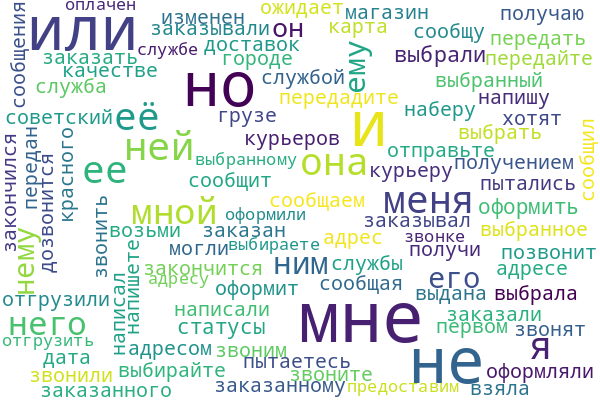

In [14]:
# ваш код для облака чистых сообщений

wc1 = WordCloud(max_font_size=70, max_words=100, background_color='white', stopwords=None, width=600, height=400)
wc1.generate(text_clean_messages_no_comas)
wc1.to_image()

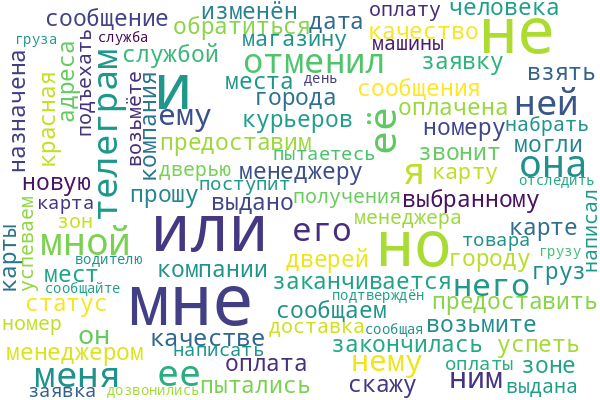

In [15]:
# ваш код для облака фродовых сообщений

wc1 = WordCloud(max_font_size=70, max_words=100, background_color='white', stopwords=None,  width=600, height=400)
wc1.generate(text_fraud_messages_no_comas)
wc1.to_image()

Из облаков слов можно сделать три вывода:
*   **Стоп-слова:** Самые часто встречающиеся слова в сообщениях --- вспомогательные слова типа «и», «или», и так далее. Такие слова не определяют смысла текстов и, как правило, не очень полезны в анализе, поэтому их называют стоп словами (stopwords). Обычно при анализе текстов такие слова просто исключают.
*   **Ключевые слова:** Заметим, что во фродовых сообщениях есть некоторые слова, которые редко встречаются в чистых сообщениях («телеграм», «отмена»). Это подсказывает нам возможный подход к построению бизнес-правила: мы можем определить набор слов-флагов, которые сигнализируют нам фрод.
*   **Лемматизация:** Наконец, видим, что в облаках слов встречаются разные формы одного и того же слова («выбрать», «выбрала», «выбранный», ...). С точки зрения сравнения строк, это разные слова, но с точки зрения языка они несут схожий смысл. Чтобы лучше учесть логику языка, в анализе текста часто применяется [лемматизация](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BC%D0%BC%D0%B0%D1%82%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F) --- процесс приведения слова к лемме (нормальной или словарной форме). Например, все три варианта («выбрать», «выбрала», «выбранный») приводятся к лемме «выбирать».

*Внимание:* если из ваших облаков слов вы не можете сделать таких выводов, то, возможно, что-то пошло не так. Напишите `@stelmakh95` --- разберемся :)

**<font color='orange'>Задача 4. Нормализация [10 баллов]</font>** Удалите из сообщений стоп-слова русского языка и проведите лемматизацию. К счастью, в Python уже есть библиотеки, которые упрощают эту задачу, поэтому вам не нужно самим придумывать стоп-слова или алгоритмы лемматизации.

### Коментарий ученика

* Было замечено, что в переменной s_words, отсутствует слово 'её', а 'ее' - есть, хотя буквы ё я не наблюдаю, а к примеру "ей" - есть, значит и её должно быть, ведь это просто разные падежи местоимения ОНА, я задумался и пришел к выводу, что нужно добавить её


In [16]:
# 1. Получите список стоп-слов

# pip install nltk
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
s_words = stopwords.words("russian") + ['её'] ## Потенциальная ошибка

# 2. Удалите стоп-слова из сообщений

# Ваш код по удалению стоп-слов здесь

clean_messages_no_comas_no_stopwords = clean_messages_no_comas.copy()
fraud_messages_no_comas_no_stopwords = fraud_messages_no_comas.copy()

pattern = re.compile(r'\b(' + r'|'.join(s_words) + r')\b\s*')

for inx_clean, inx_fraud in zip(range(len(clean_messages_no_comas)), range(len(fraud_messages_no_comas))):
    clean_messages_no_comas_no_stopwords[inx_clean] = pattern.sub('', clean_messages_no_comas_no_stopwords[inx_clean])
    fraud_messages_no_comas_no_stopwords[inx_fraud] = pattern.sub('', fraud_messages_no_comas_no_stopwords[inx_fraud])




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
# 1. Воспользуемся решением по лемматизации для русского языка от Яндекса
# pymystem3: https://pypi.org/project/pymystem3/

# pip install pymystem3

from pymystem3 import Mystem
#Создаем метод, который может лемматизировать любой текст
lemmatizer = Mystem()

#Пример
# example = lemmatizer.lemmatize("выбранный")
# print(example)

# 2. Лемматизируйте все слова в сообщениях

# Ваш код по лемматизации здесь

def lemmed(lst):
    return ''.join(lemmatizer.lemmatize('|'.join(lst))).split('|')

lemmatized_clean_messages = lemmed(clean_messages_no_comas_no_stopwords)
lemmatized_fraud_messages = lemmed(fraud_messages_no_comas_no_stopwords)

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


Ура, мы подготовили тексты к анализу. Пришло время придумать первое data-driven бизнес-правило.

**<font color='orange'>Задача 5. Частотное бизнес-правило [20 баллов]</font>** Давайте углубимся в идею с ключевыми словами и построим бизнес-правило, которое блокирует сообщения с определенными ключевыми словами.


**5.1 Анализ** Чтобы реализовать такое бизнес-правило, проделайте следующие шаги:

1. Составьте список слов, которые встречаются в нормализованных сообщениях хотя бы один раз (общий список для фродовых и чистых сообщений). Здесь хорошо использовать структуру данных множество: `set` (пройдем на 4 неделе курса).

2. Для каждого слова представьте правило, которое блокирует все сообщения с этим словом. Определите `false_positive_rate` и `false_negative_rate` такого правила

3. Для каждого слова определите метрику эффективности (в деньгах) соответствующего правила (с шага 2)

4. Отсортируйте все слова по эффективности соответствующего правила (от самых эффективных к самым неэффективным) и постройте bar chart финансовых результатов для первых 20 слов

5. Из графика определите список ключевых слов, по которому ваше правило будет блокировать сообщение. Ваше правило должно блокировать сообщение если в нем есть хотя бы одно ключевое слово.

## Пункт 1

In [18]:
## Ваш код для пунктов 1--5 здесь

set_of_all = set(' '.join(lemmatized_clean_messages).split() + ' '.join(lemmatized_fraud_messages).split())
len(set_of_all)

229

## Пункт 2

In [19]:
def rule_to_block(word_to_block, messages):

    messages1 = messages.copy()

    for i in range(len(messages1)):
        if word_to_block in messages1[i].split():
            messages1[i] = 'fraud'
        else:
            messages1[i] = 'clean'


    return messages1

In [20]:
all_messages_fixed = lemmatized_fraud_messages + lemmatized_clean_messages  # 0, 999 - fraud;  1000, 1999 - clean

dct_fpr_fnr = {}

for word in sorted(set_of_all):
    dct_fpr_fnr[word] = test_rule(rule_to_block(word, all_messages_fixed), all_messages_fixed, k_fraud_messages)


## Пункт 3

In [21]:
dct_of_money_per_word = {}

for k, v in dct_fpr_fnr.items():
    dct_of_money_per_word[k] = compute_daily_losses(*v)

## Пункт 4

In [22]:
sorted_dct_of_words = dict(sorted(dct_of_money_per_word.items(), key=lambda a: (a[1], a[0]))[:20])
sorted_dct_of_words

{'отменять': 678.5,
 'телегр': 680.0,
 'мессенджер': 680.4,
 'телега': 710.65,
 'самолет': 727.9,
 'голубой': 731.1,
 'тг': 732.8,
 'тележка': 734.35,
 'тележк': 742.5,
 'телегрме': 744.45,
 'телеграм': 744.8,
 'принятый': 746.25,
 'новое': 749.25,
 'согласованный': 749.25,
 'телегрм': 749.25,
 'котор': 751.15,
 'оно': 751.15,
 'изменить': 751.9,
 'красная': 751.9,
 'свое': 751.9}

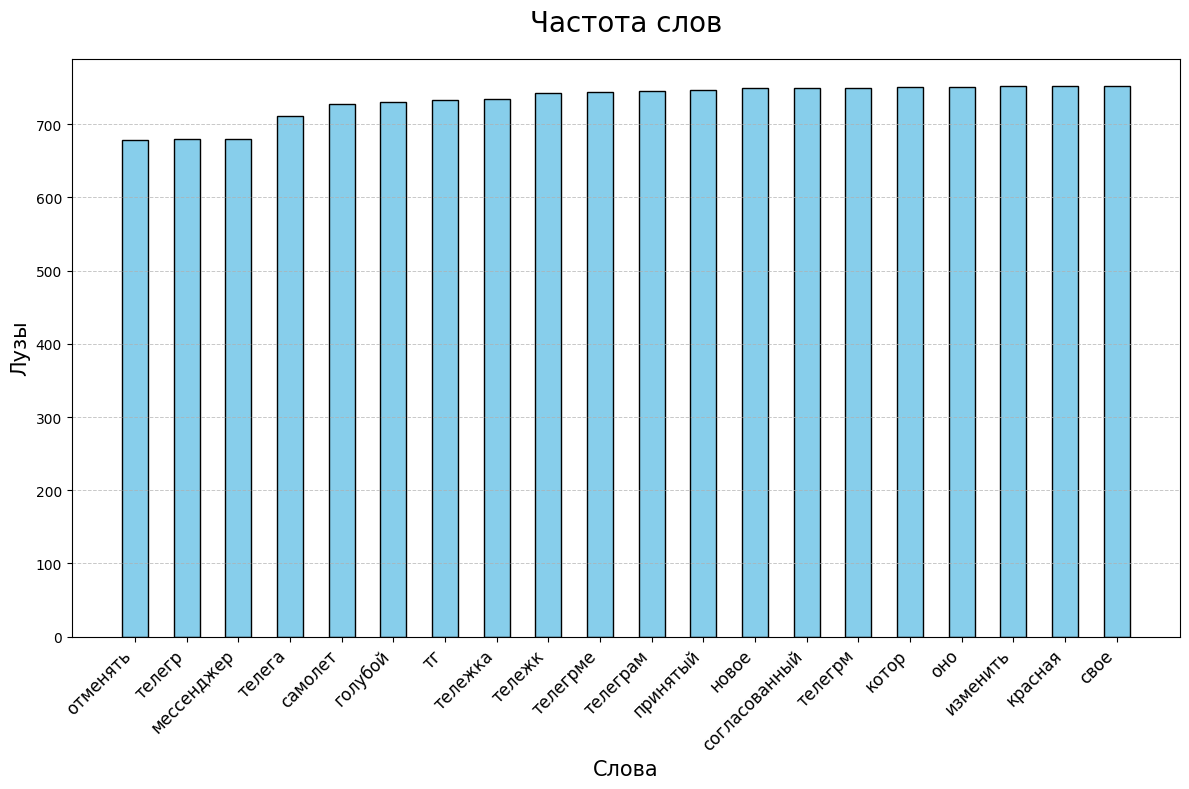

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(sorted_dct_of_words.keys(), sorted_dct_of_words.values(),
              color='skyblue', edgecolor='black', width=0.5)

ax.set_title('Частота слов', fontsize=20, pad=20)
ax.set_xlabel('Слова', fontsize=15)
ax.set_ylabel('Лузы', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()


## Пункт 5

**5.2 Разработка**  Теперь реализуйте ваше правило end-to-end:
* *Вход*: необработанное сообщение (из сырых данных)
* *Внутренность*: Подготовка и нормализация текста (задачи 3.1 и 4), поиск ключевых слов (задача 5.1)
* *Выход*: Вердикт («fraud» или «clean»)

In [24]:
import string

def end2end_rule(message: str) -> str:
  # напишите ваш код здесь и положите результат в переменную result

  result = ""

  no_comas_message = clean(message)
  no_comas_no_stopword_message = pattern.sub('', no_comas_message)
  no_comas_no_stopword_lemmatized_message = [word for word in lemmatizer.lemmatize(no_comas_no_stopword_message) if word != ' ']

  result = "clean" if len(set(list(sorted_dct_of_words.keys())) & set(no_comas_no_stopword_lemmatized_message)) == 0 else 'fraud'

  # проверка на то, что ваша функция возвращает валидное значение
  assert result in ["fraud", "clean"]

  return result

In [25]:
test_end2_end = all_messages.copy()  # fraud, clean

for inx_sent in range(len(test_end2_end)):
    test_end2_end[inx_sent] = end2end_rule(test_end2_end[inx_sent])

**5.3 Оценка эффективности**  Оцените эффективность вашего итогового бизнес-правила (аналогично задачам 2.1 и 2.2)

Если всё реализовано корректно, у вас должно получиться не более 420 млн дневных потерь

In [26]:
last_test = test_rule(test_end2_end, test_end2_end, k_fraud_messages)
money = compute_daily_losses(*last_test)
money

410.15

**5.4 Комментарий** Прокомментируйте результаты
* Как эффективность частотного бизнес-правила соотносится с бейзлайнами?
* Стоит ли внедрять его в продакшн?
* Как можно доработать это правило?

*Ваши мысли здесь*


* Для бизнес-правила и для бейзлайнов одинаковая цель, найти слова, которые отнимают нашу прибыль, чем больше фродовых слов мы найдем, тем лучше.

* Однозначно да, неплохие показатели, но нужно протестить на других данных.

* Машинное обучение для автоматического выделения новых ключевых слов с использованием моделей классификации текста. Метрики эффективности могут быть расширены за счет анализа контекста слов, что позволит повысить точность классификации.